In [ ]:
# Loqding of packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Paired')
from datetime import date, datetime
from datetime import date
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
#load Data Set
transaction = pd.read_excel(r"C:\Users\Apple\Downloads\Mentor'sKPMG_Sprocket Project Dataset.xlsx")

In [ ]:
NewCustomerList = pd.read_excel(r"C:\Users\Apple\Downloads\Mentor'sKPMG_Sprocket Project Dataset.xlsx", sheet_name=2)
customerdemography = pd.read_excel(r"C:\Users\Apple\Downloads\Mentor'sKPMG_Sprocket Project Dataset.xlsx", sheet_name=3)
customeraddress = pd.read_excel(r"C:\Users\Apple\Downloads\Mentor'sKPMG_Sprocket Project Dataset.xlsx", sheet_name=4)

In [17]:
customerdemography.head()

customer_id      first_name  last_name               job_title  \
0            1         Laraine  Medendorp     Executive Secretary   
1            2             Eli    Bockman  Administrative Officer   
2            3           Arlin     Dearle      Recruiting Manager   
3            4          Talbot        NaN                     NaN   
4            5  Sheila-kathryn     Calton           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property      Mass Customer                  N   
3                    IT      Mass Customer                  N   
4                   NaN  Affluent Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0

In [18]:
customeraddress.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [19]:
NewCustomerList.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0      Mass Customer                  N      Yes  ...    QLD  Australia   
1      Mass Customer                  N       No  ...    NSW  Australia   
2  Affluent Customer                  N       No  ...    VIC  Australia   
3  Affluent Customer                  N      Yes  ...    QLD  Australia   
4  Affluent Customer                  N       No  ...    NSW  Australia   

   property_valuation Column1 Column2  Column3   Column4  Column5  Rank  \
0                   6    0.70  0.8750  1.09375  0.929688        1     1   
1                  11    0.66  0.6600  0.82500  0.701250        1     1   
2                   5    0.64  0.6400  0.64000  0.640000        1     1   
3                   1    1.09  1.3625  1.36250  1.362500        4     4   
4                   9    0.86  0.8600  1.07500  1.075000        4     4   

      Value  
0  1.718750  
1  1.718750  
2  1.718750  
3  1.703125  
4  1.703125  

[5 rows x 23 columns]

In [20]:
transaction.head()

transaction_id  product_id  customer_id first_name  last_name  \
0               1           2         2950    Kristos    Anthony   
1               2           3         3120     Lauree  O'Donnell   
2               3          37          402      Berne    Donegan   
3               4          88         3135      Titus    Worsall   
4               5          78          787      Norma     Batrim   

  transaction_date  online_order order_status           brand product_line  \
0       2017-02-25           0.0     Approved           Solex     Standard   
1       2017-05-21           1.0     Approved   Trek Bicycles     Standard   
2       2017-10-16           0.0     Approved      OHM Cycles     Standard   
3       2017-08-31           0.0     Approved  Norco Bicycles     Standard   
4       2017-10-01           1.0     Approved  Giant Bicycles     Standard   

  product_class product_size  list_price  standard_cost  \
0        medium       medium       71.49          53.62   
1        medium        large     2091.47         388.92   
2           low       medium     1793.43         248.82   
3        medium       medium     1198.46         381.10   
4        medium        large     1765.30         709.48   

   product_first_sold_date  
0                  41245.0  
1                  41701.0  
2                  36361.0  
3                  36145.0  
4                  42226.0

#### Understanding the Data

* The data contains 4 different data sets, New Customer List, customer demography, transactions of customer 
  and address of customer.
* The data contains some empty sets:
* The brand, product line, product size, standard cost, product first sold date, contains 197 empty cells. 
  First name and last name has 3 empty cells, while online order column has 360 empty cells.


#### Limitation of the Data

* The data does not contain any data on revenue and profit
* there were also some columns without description. 

In [9]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   first_name               19997 non-null  object        
 4   last_name                19997 non-null  object        
 5   transaction_date         20000 non-null  datetime64[ns]
 6   online_order             19640 non-null  float64       
 7   order_status             20000 non-null  object        
 8   brand                    19803 non-null  object        
 9   product_line             19803 non-null  object        
 10  product_class            19803 non-null  object        
 11  product_size             19803 non-null  object        
 12  list_price               20000 n

In [10]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
first_name                   3
last_name                    3
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [21]:
transaction['online_order'] = transaction.online_order.fillna(transaction.online_order.mode()[0])
transaction['brand'] = transaction.brand.fillna(transaction.brand.mode()[0])
transaction['product_line'] = transaction.product_line.fillna(transaction.product_line.mode()[0])
transaction['product_class'] = transaction.product_class.fillna(transaction.product_class.mode()[0])
transaction['product_size'] = transaction.product_size.fillna(transaction.product_size.mode()[0])
transaction['standard_cost'] = transaction.standard_cost.fillna(transaction.standard_cost.mean())
transaction['product_first_sold_date'] = transaction.product_first_sold_date.fillna(transaction.product_first_sold_date.mode()[0])                                      

In [22]:
transaction.groupby('customer_id')['brand'].value_counts().sort_values(ascending=False).head(10)

customer_id  brand         
171          Solex             8
2783         OHM Cycles        8
1611         Norco Bicycles    7
2353         Giant Bicycles    7
1591         Solex             7
528          Solex             6
56           OHM Cycles        6
2023         Solex             6
1451         Solex             6
1946         OHM Cycles        6
Name: brand, dtype: int64

<AxesSubplot:xlabel='customer_id,brand'>

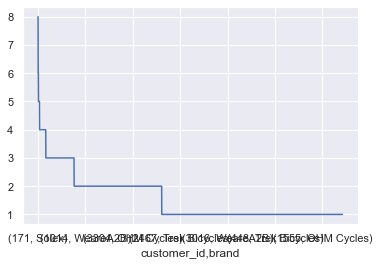

In [23]:
transaction.groupby('customer_id')['brand'].value_counts().sort_values(ascending=False).plot()

In [24]:
transaction['brand'].value_counts()

Solex             4450
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

#### Underlying Trends from the Data

* the Sotex brand is the highest ordered brans
* Halli Davidoff is the customer with the highest orders
* Majority of the customers are in the financial sector
* Majority of the customers are in the ages between 30 to 56
* Majority of the customers are from New South Wales
* Majority of the customers belongs to the mass customers wealth segment




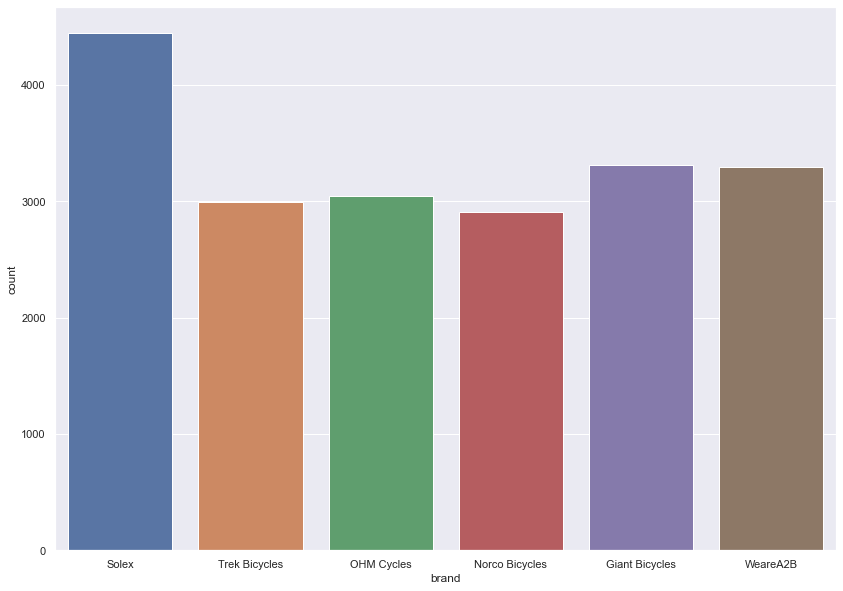

In [25]:
plt.figure(figsize=(14, 10))
sns.countplot(x='brand', data=transaction)
plt.show()

<AxesSubplot:xlabel='age_category', ylabel='count'>

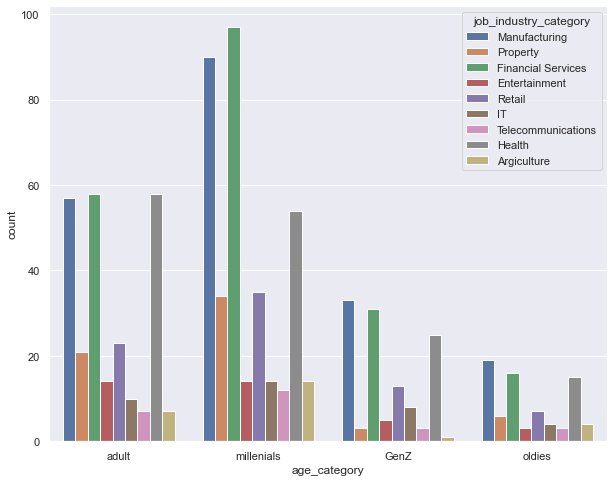

In [101]:
plt.figure(figsize=(10, 8))
sns.countplot(x='age_category', hue = 'job_industry_category', data=NewCustomerList)

In [31]:
#insert new coilumn - customers name

transaction['customer_name'] = transaction['first_name'].astype(str) + ' '+ transaction['last_name'].astype(str)

In [32]:
transaction.head()

transaction_id  product_id  customer_id first_name  last_name  \
0               1           2         2950    Kristos    Anthony   
1               2           3         3120     Lauree  O'Donnell   
2               3          37          402      Berne    Donegan   
3               4          88         3135      Titus    Worsall   
4               5          78          787      Norma     Batrim   

  transaction_date  online_order order_status           brand product_line  \
0       2017-02-25           0.0     Approved           Solex     Standard   
1       2017-05-21           1.0     Approved   Trek Bicycles     Standard   
2       2017-10-16           0.0     Approved      OHM Cycles     Standard   
3       2017-08-31           0.0     Approved  Norco Bicycles     Standard   
4       2017-10-01           1.0     Approved  Giant Bicycles     Standard   

  product_class product_size  list_price  standard_cost  \
0        medium       medium       71.49          53.62   
1        medium        large     2091.47         388.92   
2           low       medium     1793.43         248.82   
3        medium       medium     1198.46         381.10   
4        medium        large     1765.30         709.48   

   product_first_sold_date     customer_name  
0                  41245.0   Kristos Anthony  
1                  41701.0  Lauree O'Donnell  
2                  36361.0     Berne Donegan  
3                  36145.0     Titus Worsall  
4                  42226.0      Norma Batrim

In [33]:
transaction.groupby('customer_name')['brand'].value_counts().sort_values(ascending=False).head(10)

customer_name    brand         
Halli Davidoff   Solex             8
Antonin Gleaves  OHM Cycles        8
Fonz Jankin      Solex             7
Terencio 0       Norco Bicycles    7
Lyn Luquet       Giant Bicycles    7
Reese Ensor      OHM Cycles        6
Marco Denziloe   Solex             6
Courtney Meas    Solex             6
Lamar Gladman    Solex             6
Hal Braddon      Norco Bicycles    6
Name: brand, dtype: int64

In [34]:
NewCustomerList.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0      Mass Customer                  N      Yes  ...    QLD  Australia   
1      Mass Customer                  N       No  ...    NSW  Australia   
2  Affluent Customer                  N       No  ...    VIC  Australia   
3  Affluent Customer                  N      Yes  ...    QLD  Australia   
4  Affluent Customer                  N       No  ...    NSW  Australia   

   property_valuation Column1 Column2  Column3   Column4  Column5  Rank  \
0                   6    0.70  0.8750  1.09375  0.929688        1     1   
1                  11    0.66  0.6600  0.82500  0.701250        1     1   
2                   5    0.64  0.6400  0.64000  0.640000        1     1   
3                   1    1.09  1.3625  1.36250  1.362500        4     4   
4                   9    0.86  0.8600  1.07500  1.075000        4     4   

      Value  
0  1.718750  
1  1.718750  
2  1.718750  
3  1.703125  
4  1.703125  

[5 rows x 23 columns]

<AxesSubplot:xlabel='job_industry_category', ylabel='count'>

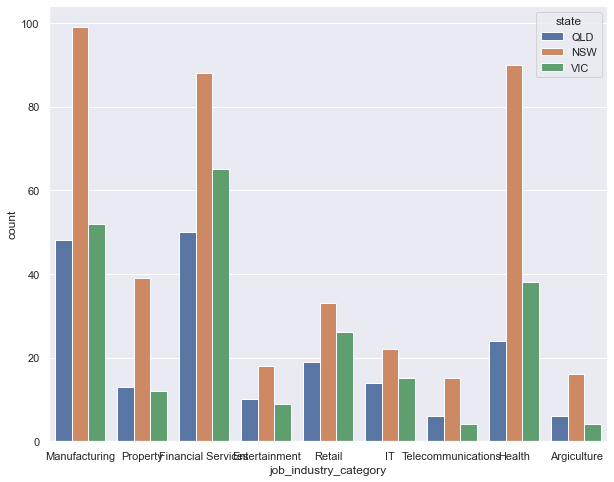

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'job_industry_category', hue = 'state', data=NewCustomerList)

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

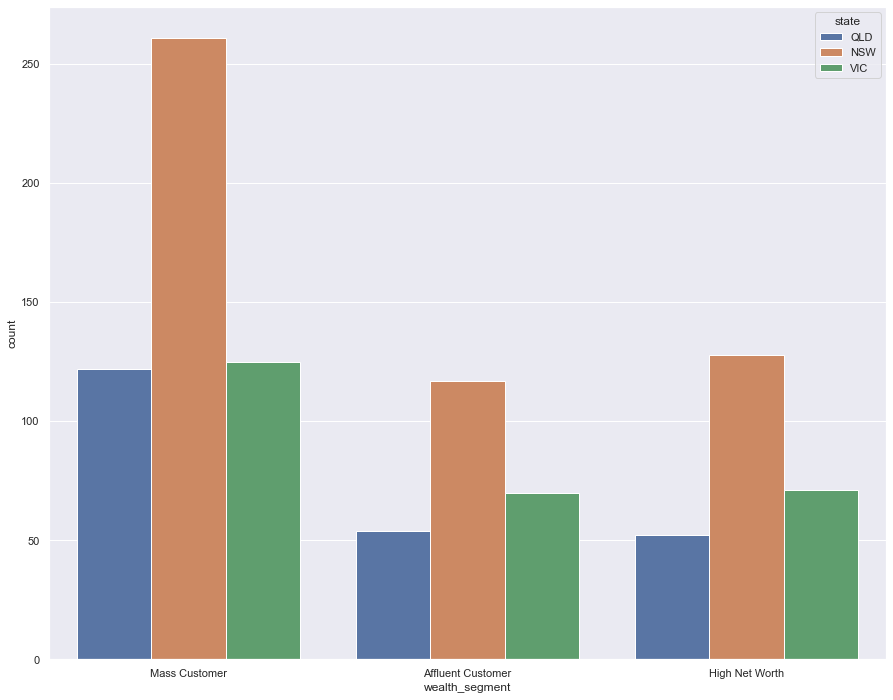

In [36]:
plt.figure(figsize=(15,12))
sns.countplot(x = 'wealth_segment', hue = 'state', data=NewCustomerList)

### Customer Segement with the Highest customer Value

* The Mass Customer Segment has the highest customer value

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

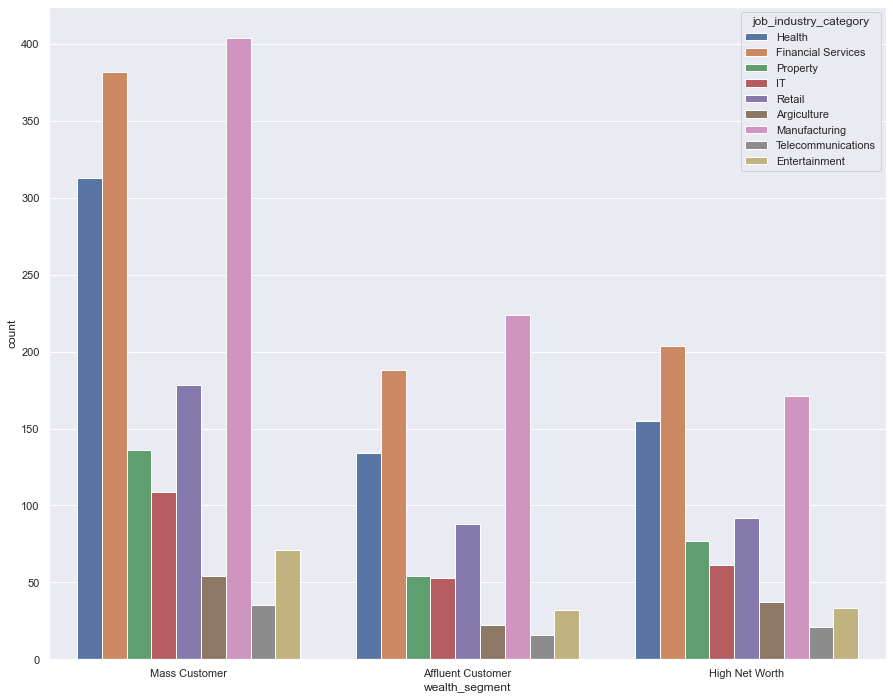

In [38]:
plt.figure(figsize=(15,12))
sns.countplot(x = 'wealth_segment', hue = 'job_industry_category', data=customerdemography)

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

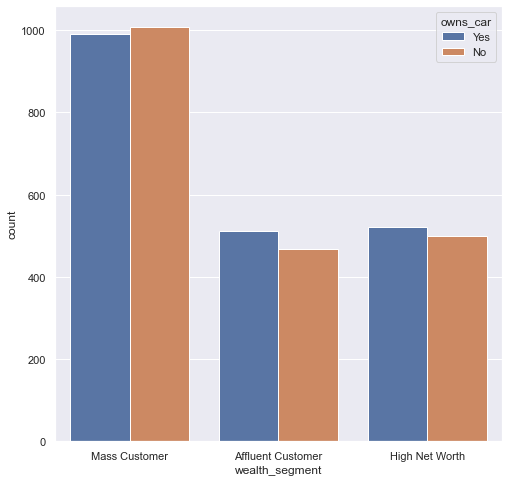

In [39]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'wealth_segment', hue = 'owns_car', data=customerdemography)

In [95]:
NewCustomerList.groupby('wealth_segment')['Value'].sum().sort_values(ascending=False).head(10)

wealth_segment
Mass Customer        449.377719
High Net Worth       222.839344
Affluent Customer    209.497031
Name: Value, dtype: float64

#### Sprocket's marketing Strategy

* the best marekting strategy for sprocket would be to channle their resources towards the Mass customers 
from New South Wales who are within tha age of 30 to 55.
* using gingles that potrays how cycling can affect their health positively will be required as majority 
are in the financial industry.
* it seems that adults  and oldies are not captured in their brand, this implies that bikes for oldies especailly should be produced.

In [97]:
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [98]:
NewCustomerList['age'] = NewCustomerList['DOB'].apply(age)

In [99]:
NewCustomerList.head()

first_name  last_name  past_3_years_bike_related_purchases        DOB  \
0    Chickie    Brister                                   86 1957-07-12   
1      Morly     Genery                                   69 1970-03-22   
2    Ardelis  Forrester                                   10 1974-08-28   
3     Lucine      Stutt                                   64 1979-01-28   
4    Melinda     Hadlee                                   34 1965-09-21   

                    job_title job_industry_category     wealth_segment  \
0             General Manager         Manufacturing      Mass Customer   
1         Structural Engineer              Property      Mass Customer   
2      Senior Cost Accountant    Financial Services  Affluent Customer   
3  Account Representative III         Manufacturing  Affluent Customer   
4           Financial Analyst    Financial Services  Affluent Customer   

  deceased_indicator owns_car  tenure  ... property_valuation  Column1  \
0                  N      Yes      14  ...                  6     0.70   
1                  N       No      16  ...                 11     0.66   
2                  N       No      10  ...                  5     0.64   
3                  N      Yes       5  ...                  1     1.09   
4                  N       No      19  ...                  9     0.86   

  Column2  Column3   Column4  Column5  Rank     Value  age_category   age  
0  0.8750  1.09375  0.929688        1     1  1.718750         adult  65.0  
1  0.6600  0.82500  0.701250        1     1  1.718750    millenials  52.0  
2  0.6400  0.64000  0.640000        1     1  1.718750    millenials  48.0  
3  1.3625  1.36250  1.362500        4     4  1.703125    millenials  43.0  
4  0.8600  1.07500  1.075000        4     4  1.703125         adult  57.0  

[5 rows x 24 columns]

In [ ]:
NewCustomerList['age_category'] = NewCustomerList['age'].apply(age_group)

In [88]:
NewCustomerList.head()

first_name  last_name  past_3_years_bike_related_purchases        DOB  \
0    Chickie    Brister                                   86 1957-07-12   
1      Morly     Genery                                   69 1970-03-22   
2    Ardelis  Forrester                                   10 1974-08-28   
3     Lucine      Stutt                                   64 1979-01-28   
4    Melinda     Hadlee                                   34 1965-09-21   

                    job_title job_industry_category     wealth_segment  \
0             General Manager         Manufacturing      Mass Customer   
1         Structural Engineer              Property      Mass Customer   
2      Senior Cost Accountant    Financial Services  Affluent Customer   
3  Account Representative III         Manufacturing  Affluent Customer   
4           Financial Analyst    Financial Services  Affluent Customer   

  deceased_indicator owns_car  tenure  ... property_valuation  Column1  \
0                  N      Yes      14  ...                  6     0.70   
1                  N       No      16  ...                 11     0.66   
2                  N       No      10  ...                  5     0.64   
3                  N      Yes       5  ...                  1     1.09   
4                  N       No      19  ...                  9     0.86   

  Column2  Column3   Column4  Column5  Rank     Value  age_category   age  
0  0.8750  1.09375  0.929688        1     1  1.718750         adult  65.0  
1  0.6600  0.82500  0.701250        1     1  1.718750    millenials  52.0  
2  0.6400  0.64000  0.640000        1     1  1.718750    millenials  48.0  
3  1.3625  1.36250  1.362500        4     4  1.703125    millenials  43.0  
4  0.8600  1.07500  1.075000        4     4  1.703125         adult  57.0  

[5 rows x 24 columns]

In [89]:
NewCustomerList['age'].max()

84.0

In [81]:
def age_group(x):
    if x >= 75:
        return 'oldies'
    elif x >= 56:
        return 'adult'
    elif x >= 30:
        return 'millenials'
    elif x >= 20:
        return 'GenZ'

In [ ]:
NewCustomerList['age_category'] = NewCustomerList['age'].apply(age_group)

In [100]:
NewCustomerList.head()

first_name  last_name  past_3_years_bike_related_purchases        DOB  \
0    Chickie    Brister                                   86 1957-07-12   
1      Morly     Genery                                   69 1970-03-22   
2    Ardelis  Forrester                                   10 1974-08-28   
3     Lucine      Stutt                                   64 1979-01-28   
4    Melinda     Hadlee                                   34 1965-09-21   

                    job_title job_industry_category     wealth_segment  \
0             General Manager         Manufacturing      Mass Customer   
1         Structural Engineer              Property      Mass Customer   
2      Senior Cost Accountant    Financial Services  Affluent Customer   
3  Account Representative III         Manufacturing  Affluent Customer   
4           Financial Analyst    Financial Services  Affluent Customer   

  deceased_indicator owns_car  tenure  ... property_valuation  Column1  \
0                  N      Yes      14  ...                  6     0.70   
1                  N       No      16  ...                 11     0.66   
2                  N       No      10  ...                  5     0.64   
3                  N      Yes       5  ...                  1     1.09   
4                  N       No      19  ...                  9     0.86   

  Column2  Column3   Column4  Column5  Rank     Value  age_category   age  
0  0.8750  1.09375  0.929688        1     1  1.718750         adult  65.0  
1  0.6600  0.82500  0.701250        1     1  1.718750    millenials  52.0  
2  0.6400  0.64000  0.640000        1     1  1.718750    millenials  48.0  
3  1.3625  1.36250  1.362500        4     4  1.703125    millenials  43.0  
4  0.8600  1.07500  1.075000        4     4  1.703125         adult  57.0  

[5 rows x 24 columns]

<AxesSubplot:xlabel='age_category', ylabel='count'>

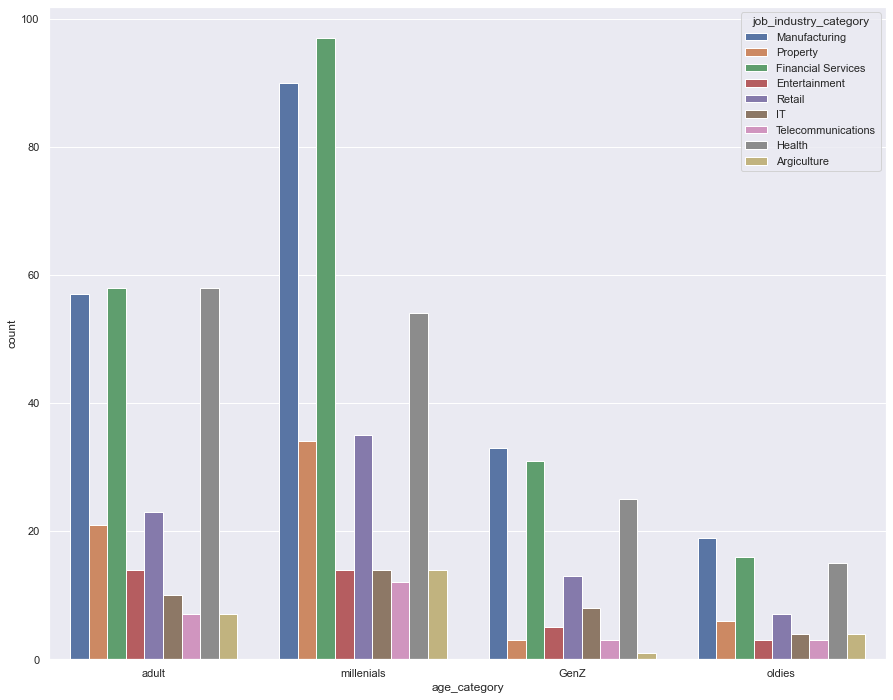

In [92]:
plt.figure(figsize=(15,12))
sns.countplot(x = 'age_category', hue = 'job_industry_category', data=NewCustomerList)

In [49]:
customeraddress.head().isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [50]:
customerdemography['customer_id'].unique()

array([   1,    2,    3, ..., 3998, 3999, 4000], dtype=int64)

In [51]:
customerdemographycomplete = pd.merge(customerdemography, customeraddress, on= ['customer_id'], how="inner")

In [52]:
customerdemographycomplete.tail()

customer_id first_name last_name              job_title  \
3991         3996    Rosalia  Halgarth  VP Product Management   
3992         3997     Blanch    Nisuis        Statistician II   
3993         3998     Sarene   Woolley      Assistant Manager   
3994         3999  Patrizius       NaN                    NaN   
3995         4000      Kippy   Oldland   Software Engineer IV   

     job_industry_category     wealth_segment deceased_indicator  \
3991                Health      Mass Customer                  N   
3992         Manufacturing     High Net Worth                  N   
3993                    IT     High Net Worth                  N   
3994         Manufacturing  Affluent Customer                  N   
3995                   NaN  Affluent Customer                  N   

                     default owns_car  tenure                    address  \
3991                    -100       No    19.0         0 Transport Center   
3992                â¦testâ§      Yes     1.0        4 Dovetail Crossing   
3993                     NaN       No     NaN       736 Roxbury Junction   
3994  Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ       Yes    10.0            1482 Hauk Trail   
3995                     0/0       No    11.0  57042 Village Green Point   

      postcode state    country  property_valuation  
3991      3977   VIC  Australia                   6  
3992      2350   NSW  Australia                   2  
3993      2540   NSW  Australia                   6  
3994      3064   VIC  Australia                   3  
3995      4511   QLD  Australia                   6

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

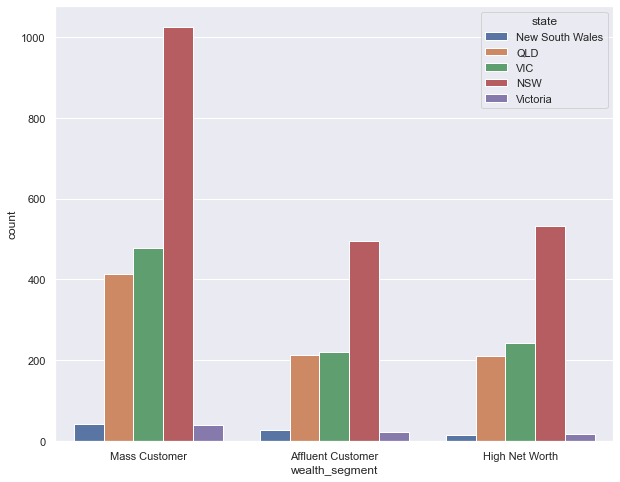

In [53]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'wealth_segment', hue = 'state', data=customerdemographycomplete )


In [54]:
transaction['customer_id'].unique

<bound method Series.unique of 0        2950
1        3120
2         402
3        3135
4         787
         ... 
19995    1018
19996     127
19997    2284
19998    2764
19999    1144
Name: customer_id, Length: 20000, dtype: int64>

#### Who should the marketing team target out of the new customer list

In [ ]:
* Resources should be channled to marketing strategies that targets the customers betwee teh ages of 30 to 56
  in New South Wales
* Also those who are in the manufacturing and finance sectors 

In [55]:
NewCustomerList.groupby('age_category')['past_3_years_bike_related_purchases'].sum().sort_values(ascending=False).head(10)

age_category
48.0    1452
46.0    1447
56.0    1348
47.0    1249
44.0    1234
42.0    1196
41.0    1157
30.0    1125
61.0    1115
63.0    1102
Name: past_3_years_bike_related_purchases, dtype: int64

In [56]:
Customers = pd.merge(customerdemographycomplete, transaction, on= ['customer_id'], how="inner")

In [57]:
Customers.tail()

customer_id first_name_x last_name_x job_title job_industry_category  \
19963         3500         Josy     Fleeman       NaN         Entertainment   
19964         3500         Josy     Fleeman       NaN         Entertainment   
19965         3500         Josy     Fleeman       NaN         Entertainment   
19966         3500         Josy     Fleeman       NaN         Entertainment   
19967         3500         Josy     Fleeman       NaN         Entertainment   

          wealth_segment deceased_indicator                 default owns_car  \
19963  Affluent Customer                  N  Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ        No   
19964  Affluent Customer                  N  Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ        No   
19965  Affluent Customer                  N  Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ        No   
19966  Affluent Customer                  N  Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ        No   
19967  Affluent Customer                  N  Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ        No   

       tenure  ... online_order  order_status           brand product_line  \
19963    17.0  ...          1.0      Approved  Giant Bicycles         Road   
19964    17.0  ...          0.0      Approved        WeareA2B     Standard   
19965    17.0  ...          0.0      Approved  Giant Bicycles     Standard   
19966    17.0  ...          0.0      Approved        WeareA2B     Standard   
19967    17.0  ...          1.0      Approved      OHM Cycles     Standard   

       product_class  product_size  list_price standard_cost  \
19963         medium        medium      792.90        594.68   
19964         medium        medium     1228.07        400.91   
19965         medium         small     1311.44       1167.18   
19966         medium        medium       60.34         45.26   
19967           high        medium     1458.17        874.90   

      product_first_sold_date customer_name  
19963                 33879.0  Josy Fleeman  
19964                 36668.0  Josy Fleeman  
19965                 33888.0  Josy Fleeman  
19966                 34165.0  Josy Fleeman  
19967                 38750.0  Josy Fleeman  

[5 rows x 30 columns]

<AxesSubplot:xlabel='brand', ylabel='count'>

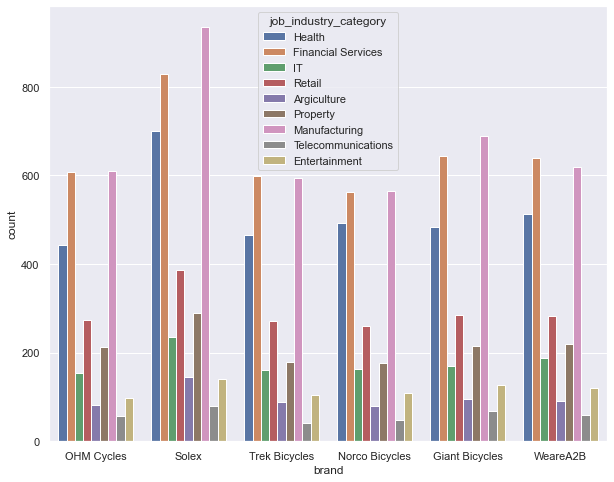

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'brand', hue = 'job_industry_category', data=Customers)


<AxesSubplot:>

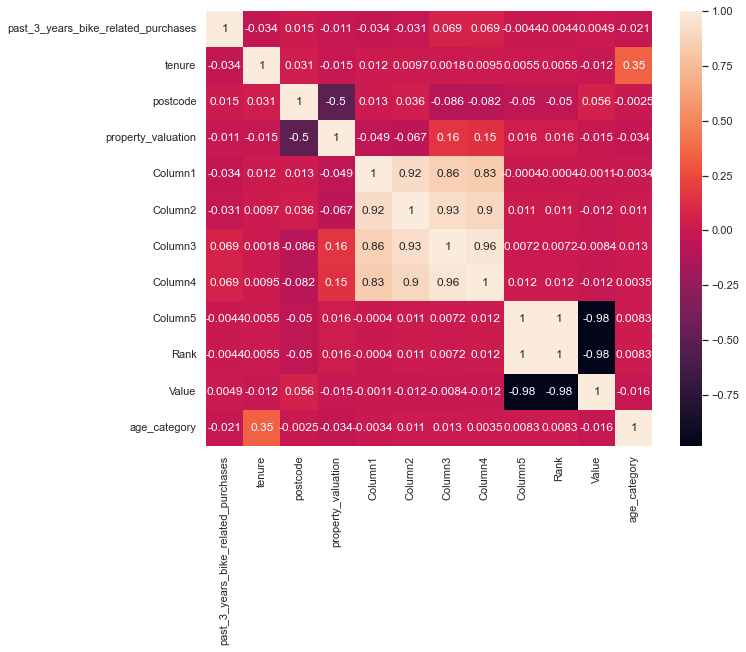

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(NewCustomerList.corr(), annot= True)


In [60]:
NewCustomerList.drop('gender', axis=1, inplace=True)

In [61]:
NewCustomerList.head()

first_name  last_name  past_3_years_bike_related_purchases        DOB  \
0    Chickie    Brister                                   86 1957-07-12   
1      Morly     Genery                                   69 1970-03-22   
2    Ardelis  Forrester                                   10 1974-08-28   
3     Lucine      Stutt                                   64 1979-01-28   
4    Melinda     Hadlee                                   34 1965-09-21   

                    job_title job_industry_category     wealth_segment  \
0             General Manager         Manufacturing      Mass Customer   
1         Structural Engineer              Property      Mass Customer   
2      Senior Cost Accountant    Financial Services  Affluent Customer   
3  Account Representative III         Manufacturing  Affluent Customer   
4           Financial Analyst    Financial Services  Affluent Customer   

  deceased_indicator owns_car  tenure  ...    country  property_valuation  \
0                  N      Yes      14  ...  Australia                   6   
1                  N       No      16  ...  Australia                  11   
2                  N       No      10  ...  Australia                   5   
3                  N      Yes       5  ...  Australia                   1   
4                  N       No      19  ...  Australia                   9   

  Column1 Column2  Column3   Column4  Column5  Rank     Value  age_category  
0    0.70  0.8750  1.09375  0.929688        1     1  1.718750          65.0  
1    0.66  0.6600  0.82500  0.701250        1     1  1.718750          52.0  
2    0.64  0.6400  0.64000  0.640000        1     1  1.718750          48.0  
3    1.09  1.3625  1.36250  1.362500        4     4  1.703125          43.0  
4    0.86  0.8600  1.07500  1.075000        4     4  1.703125          57.0  

[5 rows x 23 columns]